In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import stand

In [11]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv(f"{path}/diabetes.csv", header=0, names=col_names)


In [12]:

pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
X = pima.drop(['label'], axis=1)
X.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [18]:
y = pima['label']
y.head()

,label
0,1
1,0
2,1
3,0
4,1


In [25]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [26]:
model = DecisionTreeClassifier()


In [27]:

model.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
y_pred = model.predict(X_test)

##Evaluating Model

In [29]:
print("accuracy : ", metrics.accuracy_score(y_test,y_pred))

accuracy :  0.696969696969697


##Visualizing Decision Trees

In [31]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [34]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled =True,rounded = True, special_characters=True,
                feature_names=X.columns, class_names=['0','1'])


In [38]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


In [39]:
graph.write_png('diabetes.png')


True

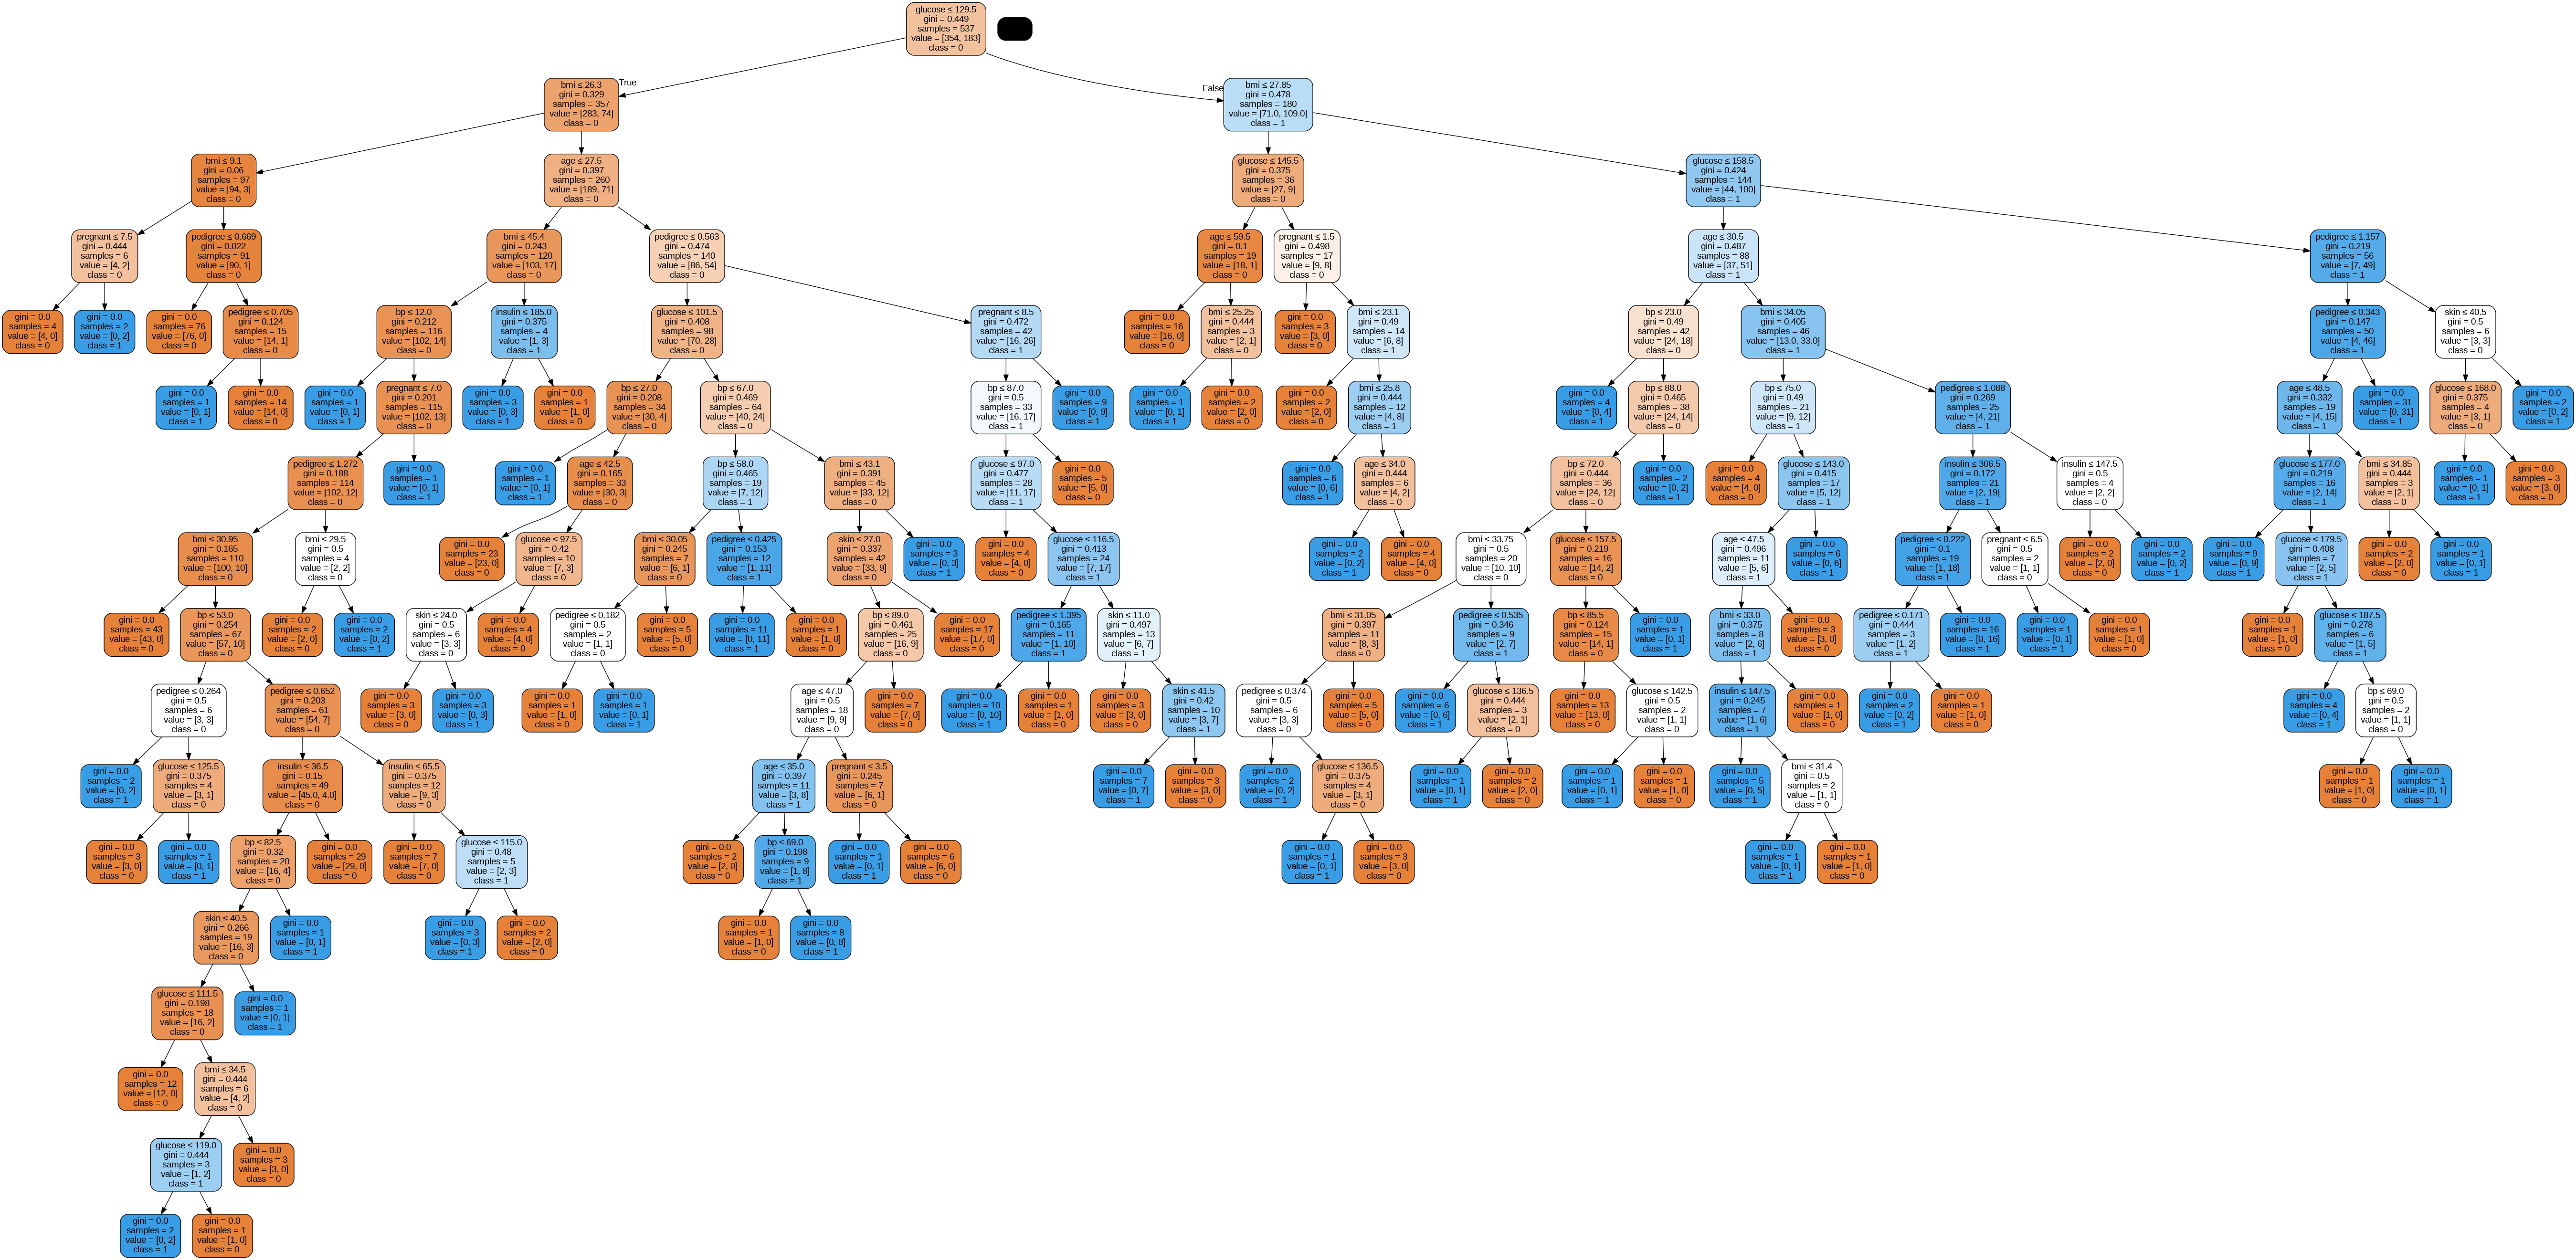

In [43]:
Image(graph.create_png())

In [58]:
model_opt = DecisionTreeClassifier(criterion='entropy',max_depth=3)


In [59]:
model_opt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [65]:
y_pred = model_opt.predict(X_test)

In [66]:
metrics.accuracy_score(y_test,y_pred)

0.7705627705627706

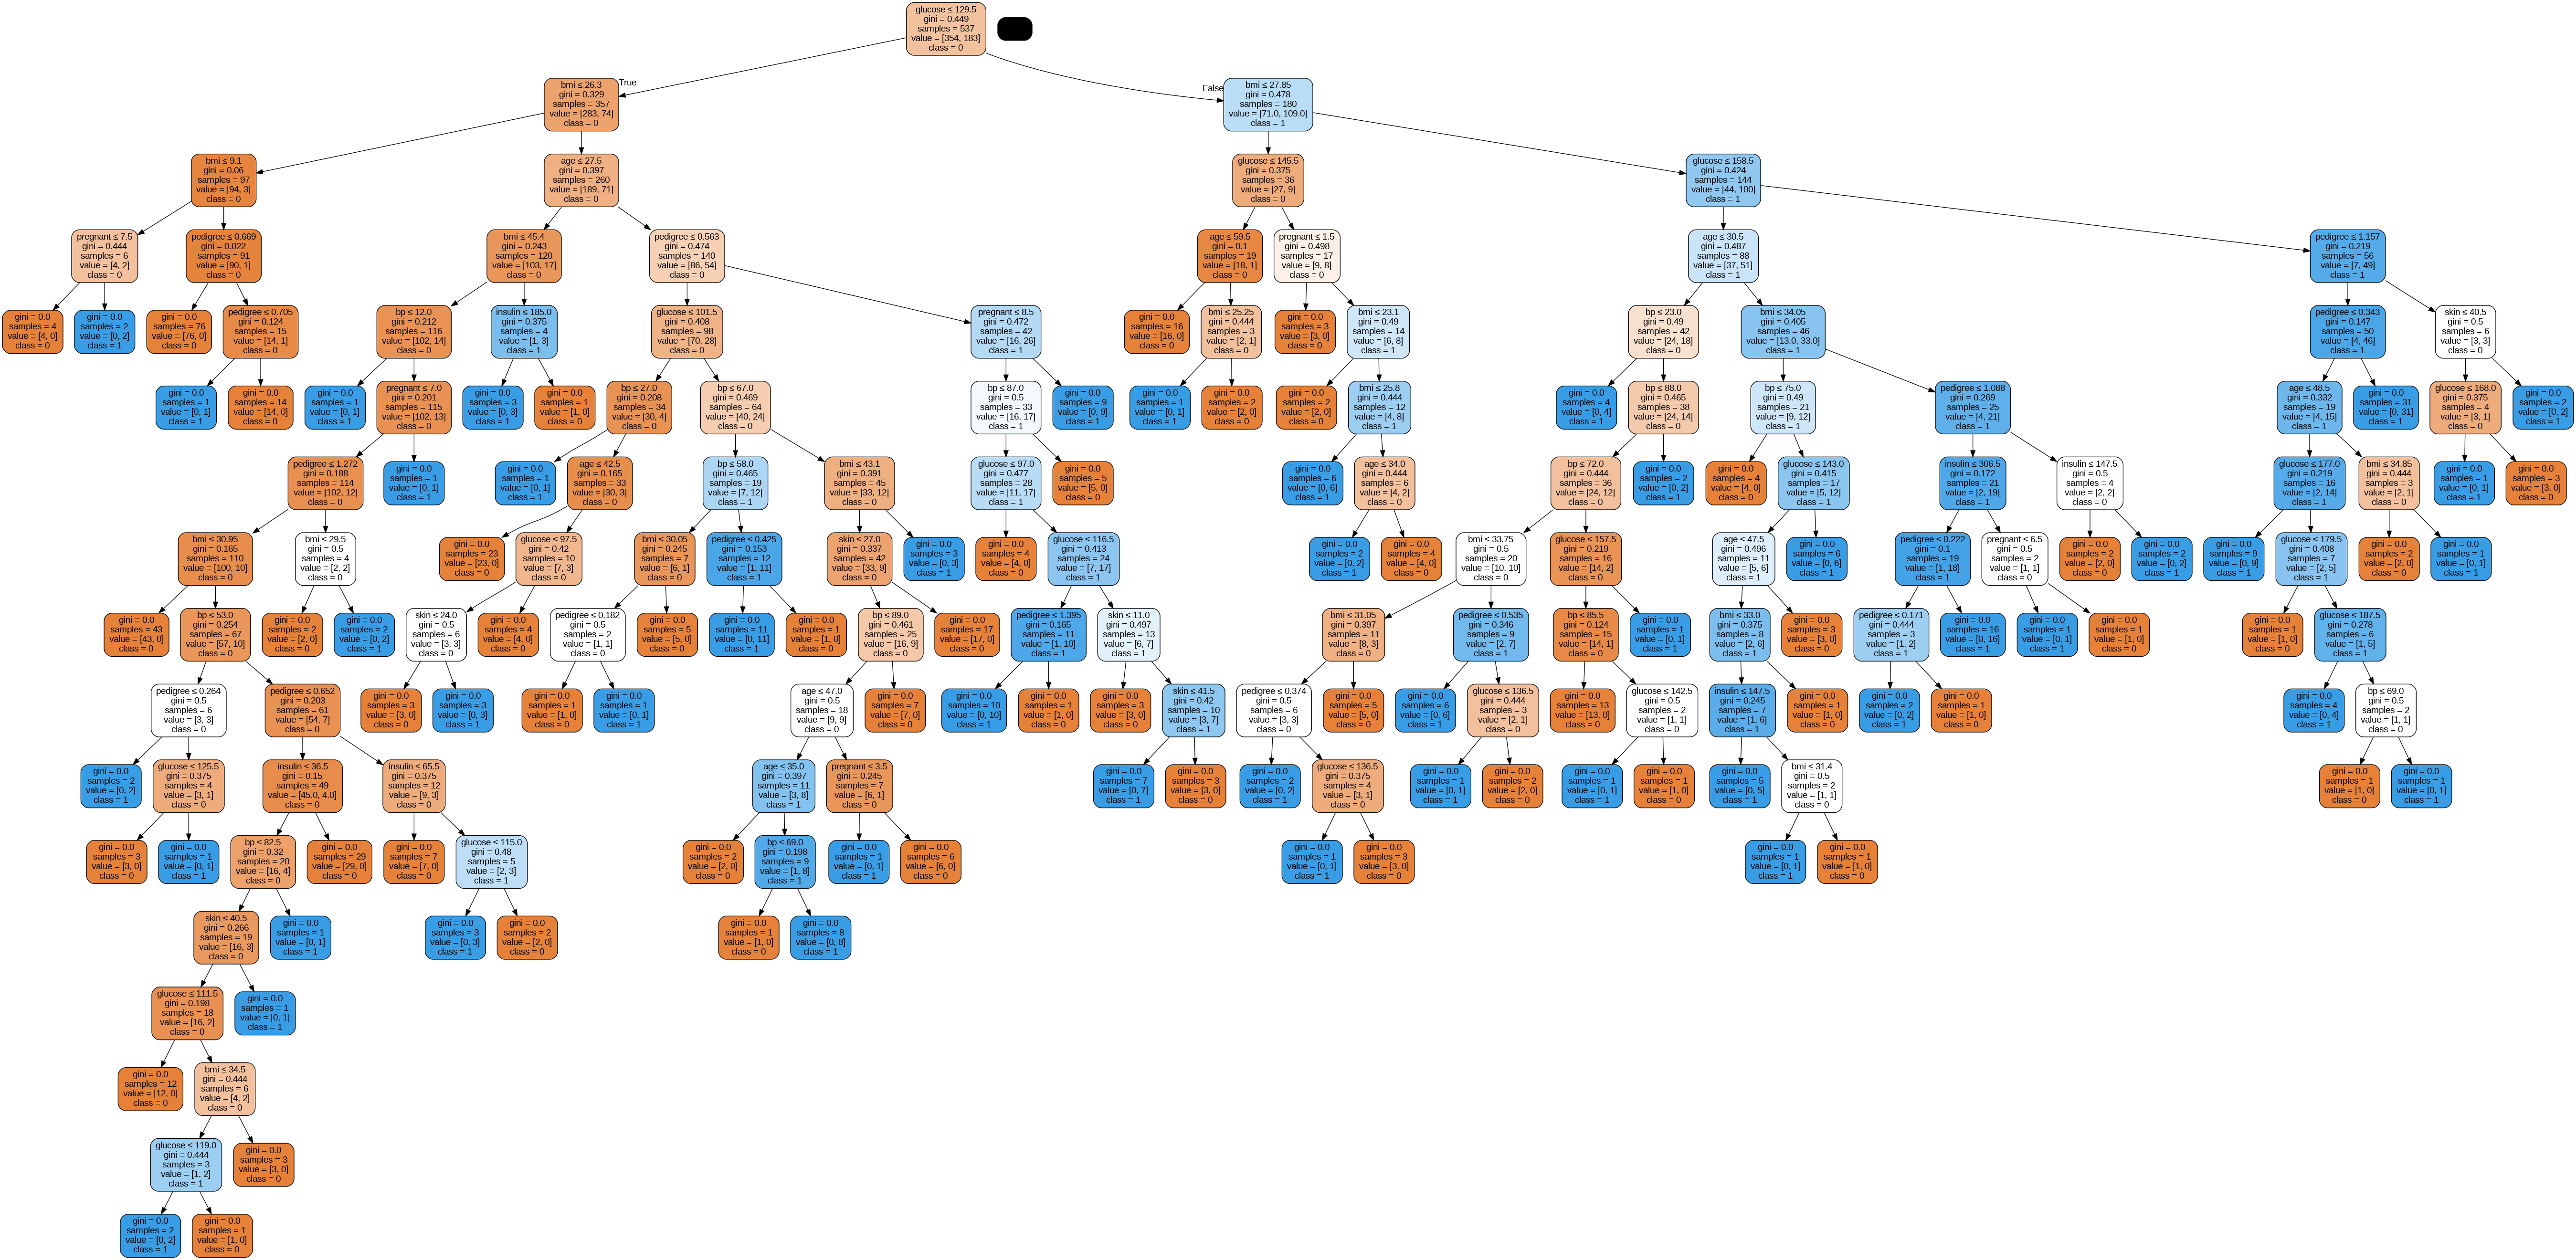

In [67]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled =True,rounded = True, special_characters=True,
                feature_names=X.columns, class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())


In [50]:
X

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


#DT with Iris daatset

In [52]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score


In [55]:
iris_df = load_iris()
model_iris = DecisionTreeClassifier()

In [57]:
cross_val_score(model_iris, iris_df.data,iris_df.target,cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])